In [1]:
import os
from pathlib import Path
os.getcwd()
from tifffile import imread
from oneat.NEATModels import NEATSynamic
from oneat.pretrained import  get_model_folder
from oneat.NEATModels.config import dynamic_config
from oneat.NEATUtils import helpers
from oneat import test_image_brightfield
from oneat.NEATUtils.helpers import load_json
example_directory = os.getcwd() + '/hela_example/'
results_directory = example_directory + '/Results/'
Path(example_directory).mkdir(exist_ok=True)
Path(results_directory).mkdir(exist_ok=True)
model = NEATSynamic.local_from_pretrained(example_directory,'Cellsplitdetectorbrightfield')



C:\Users\rando\anaconda3\envs\naparienv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rando\anaconda3\envs\naparienv\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\rando\anaconda3\envs\naparienv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


class <class 'oneat.NEATModels.neat_faststandard.NEATSynamic'> name Cellsplitdetectorbrightfield
Found model 'Cellsplitdetectorbrightfield' for 'NEATSynamic'.
C:\Users\rando\Downloads\CAPED-AI-oneat\Demo/hela_example/ Cellsplitdetectorbrightfield {'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4, 'c': 5} {'Normal': 0, 'Division': 1}


In [2]:
#Data will be downloaded in .keras folder in the home directory
imagename = test_image_brightfield(example_directory)
print(Path(imagename))

C:\Users\rando\.keras\datasets\brightfield


In [3]:
n_tiles = (4,4)
event_threshold = 0.999
event_confidence = 0.9
iou_threshold = 0.1
fidelity = 4
downsamplefactor = 1
model.predict_synamic(imagename,
                           results_directory, 
                           n_tiles = n_tiles, 
                           event_threshold = event_threshold, 
                           event_confidence = event_confidence,
                           iou_threshold = iou_threshold,
                           fidelity = fidelity,
                           downsamplefactor = downsamplefactor )

C:\Users\rando\Downloads\CAPED-AI-oneat\Demo/hela_example/ Cellsplitdetectorbrightfield {'Normal': 0, 'Division': 1} {'x': 0, 'y': 1, 't': 2, 'h': 3, 'w': 4, 'c': 5}
Detecting event locations


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [2:44:26<00:00, 41.11s/it]


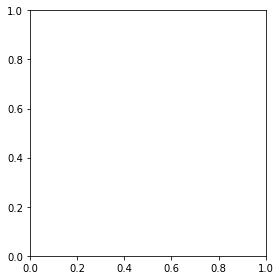

In [5]:
from oneat.NEATUtils import NEATViz

imagedir = example_directory
heatmapdir = results_directory
csvdir = heatmapdir
categories_json = example_directory + 'Cellsplitcategorieshelaflou.json'
fileextension = '*tif'
thresh = 1 - 1.0E-2

event_threshold = [thresh, thresh]
Vizdetections = NEATViz(imagedir, 
                        heatmapdir, 
                        csvdir, 
                        categories_json,  
                        event_threshold, 
                        fileextension = fileextension)